#线性关系（2）
##相关性
###Author:leftchen
###contact:lefty-chen@hotmail.com
###引用以及更多课程： www.quantopian.com/lectures

在前一章里，我们探讨了两组数据之间的线性关系，我们用回归的方式建立简单的模型，并利用ANOVA对模型的质量进行评估。当线性回归只有两组变量并且系数很大可能是非0时（p值远远小于5%），我们可以说这两组数据是线性相关的。回归可以确定这两组变量是肯定有联系的，但如何量化这种联系，则需要引入一个全新的概念，相关性， 在这里们把它定义为r。

与此同时我们还需要搞清楚一个概念，就是协方差，cov。我们知道方差（Var）是对一组数据偏差值的量化评估。cov则是对多组多变量之间整体偏差值得量化评估。cov可以评估两组数据的偏差值，也可以评估多组的。

当然每组数据的协方差大小不一，所以便于计算评估两组数据之间的相关性，我们用cov除以每组数据的标准差，得到标准化的数据，也就是开头我们提到的相关性，r。

r是一个什么概念？数值基于[-1,1]，当等于1时，两组数据完全正相关，-1时是完全负相关，0时，两组数据缺少单一的线性关系。 

下面让我们写个例子：


In [6]:
%matplotlib inline 
#导入相关模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
X = np.random.rand(50)#生成50个随机数
Y = 2 * X + np.random.normal(0,0.1,50) #线性回归的残值假设 1 正太分布 2 方差不变
print("协方差: \n%s" %np.cov(X,Y))#协方差
print("相关性: \n%s" %np.corrcoef(X,Y))#相关性

协方差: 
[[ 0.07368303  0.14783234]
 [ 0.14783234  0.3077747 ]]
相关性: 
[[ 1.          0.98167848]
 [ 0.98167848  1.        ]]


我们看到的结果不是单一的数字，而是一个矩阵。矩阵里左对角线的数字代表了变量自相关的协方差，也就是方差。而它本身的相关性肯定也是1了。
如果不信的话，我们可以简单验证下：

In [8]:
cov = np.cov(X,Y)
coef = np.corrcoef(X,Y)
print("方差差值:%s" %(cov[0,0] - X.var(ddof = 1)))#将 var的自由度设为和cov一样
print("相关性差值:%s"%(coef[0,1] - cov[0,1]/(X.std(ddof = 1) * Y.std(ddof = 1))))

方差差值:0.0
相关性差值:0.0


二者的区别几乎等于0。

##Spearman 等级相关性

Ok，统计的相关性讲完了，下面开始讲重点

相关性里还有一个概念叫做Spearman等级相关性。它是给两组数据各自排名，然后再寻找其相关性。
等级相关性在处理不符合线性相关的假设的数据，表现良好。
我们来看个例子：




In [9]:
import scipy.stats as stats
import math 

In [449]:
data = [10,9,7,5,5]
print("原数据:%s" %data)
print("等级排名:%s" %list(stats.rankdata(data,method='average')))

原数据:[10, 9, 7, 5, 5]
等级排名:[5.0, 4.0, 3.0, 1.5, 1.5]


上述例子中我们运用的是平均法。在这个例子5个数里，10是最大的值，得5，9其次大，得4，7再次得3。剩下两个5应该是1和2，但两数相同，所以平均为各为1.5。当然还有其他办法去算排名，这里就不多做介绍了。等级相关性的计算方法是，首先求出两组数据中，每一对数据的等级差，然后求和乘以6再除以n * (n^2-1); 最后用1减去前面计算所得，即是我们所要的相关性。写成函数的形式如下：


In [11]:
def spearman_rank_corr(X,Y):
    X_rank = stats.rankdata(X, method = 'average')
    Y_rank = stats.rankdata(Y, method = 'average')
    n_X = len(X_rank)
    n_Y = len(Y_rank)
    if n_X != n_Y:
        raise ValueError("X and Y have different dimentions!")
    else:
        diff = X_rank - Y_rank
        r_s = 1 - 6 * np.sum(diff * diff)/(n_X * (n_X**2 - 1))
        return r_s

等级相关和统计相关大致一样，值域在[-1,1]之间，而0表示缺少单一的线性相关。至于什么是缺少单一的线性相关，我们可以看下面这个例子:

In [12]:
X = np.random.rand(50)
Y_Test = X[2:-1]#Y值取X延后两个
X_Test = X[0:-3]#数据对齐
print("X:%s" %str(X_Test)) 
print("Y:%s" %str(Y_Test))
try:
    print("等级相关:%s"%spearman_rank_corr(X_Test,Y_Test))
    print("统计相关:%a"%np.corrcoef(X_Test, Y_Test)[0,1])
except ValueError as e:
    print(e)
    


X:[ 0.31230979  0.32849374  0.60539398  0.63858298  0.79400978  0.94895606
  0.17951259  0.91530665  0.69641289  0.44388915  0.8695044   0.71441902
  0.2667796   0.68944674  0.76458982  0.23809717  0.84411596  0.83904474
  0.29757493  0.35799307  0.95500068  0.02745752  0.08653614  0.24188741
  0.15438621  0.11295454  0.00483847  0.22554166  0.48403294  0.37174826
  0.77970179  0.14046083  0.97142068  0.94296204  0.52619035  0.96162025
  0.04953272  0.74882249  0.54144698  0.66865559  0.7258002   0.47364521
  0.28987003  0.66531958  0.94479758  0.14872988  0.72925229]
Y:[ 0.60539398  0.63858298  0.79400978  0.94895606  0.17951259  0.91530665
  0.69641289  0.44388915  0.8695044   0.71441902  0.2667796   0.68944674
  0.76458982  0.23809717  0.84411596  0.83904474  0.29757493  0.35799307
  0.95500068  0.02745752  0.08653614  0.24188741  0.15438621  0.11295454
  0.00483847  0.22554166  0.48403294  0.37174826  0.77970179  0.14046083
  0.97142068  0.94296204  0.52619035  0.96162025  0.049532

通过上述例子可以看出，统计和等级相关都没法解释时间上的自相关性。在时间序列中，我们会深入探讨这种数据联系。

下面让我们来做个试验，看看两种相关性区别有多大

In [13]:
n_experiments = 1000 #做一千次试验
n_array = 100#试验数组的长度
noise = 1#干扰系数
spearman_dist = np.ndarray(n_experiments)#记录每次试验的相关性
corr_dist = np.ndarray(n_experiments)
for i in range(n_experiments):
    X_ex = np.random.poisson(size = n_array)#我们用了泊松分布，这样数据就打破了假设：符合正太分布
    Y_ex = np.exp(X_ex) + noise * np.random.normal(size=n_array) 
    spearman_dist[i] = spearman_rank_corr(X_ex,Y_ex)
    corr_dist[i] = np.corrcoef(X_ex,Y_ex)[0,1]
print("等级相关性平均值:%s"%np.mean(spearman_dist))
print("统计相关性平均值:%s"%np.mean(corr_dist))

等级相关性平均值:0.875654815482
统计相关性平均值:0.77333695711


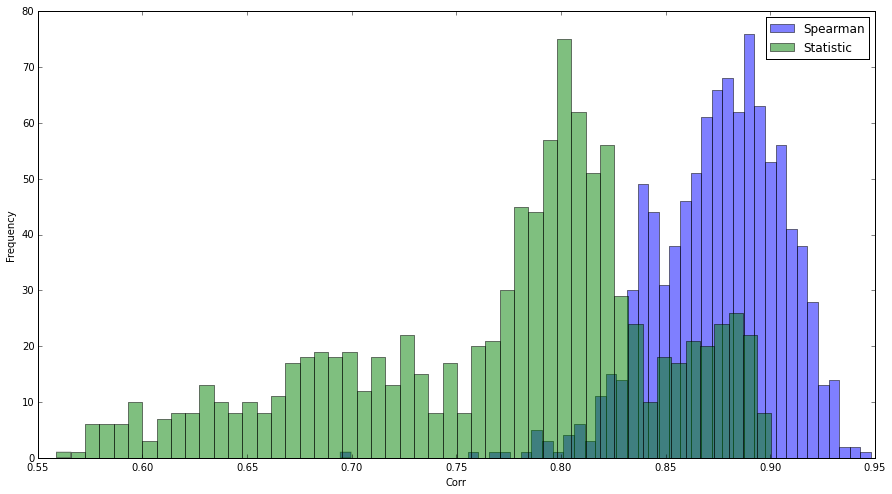

In [14]:
plt.hist(spearman_dist,bins = 50, alpha = 0.5)
plt.hist(corr_dist,bins = 50, alpha = 0.5)
plt.legend(["Spearman", "Statistic"])
plt.xlabel("Corr")
plt.ylabel("Frequency");
plt.gcf().set_size_inches(15,8)
plt.show()

通过图中我们可以清楚的发现，等级相关性的误差要比统计相关性的误差小很多，置信区间也更小。
但如果两组数据都符合正太分布或是噪音干扰小时，结果会是如何？

In [15]:
n_experiments = 1000 #做一千次试验
n_array = 100#试验数组的长度
noise = 1#干扰系数
spearman_dist = np.ndarray(n_experiments)#记录每次试验的相关性
corr_dist = np.ndarray(n_experiments)
for i in range(n_experiments):
    X_ex = np.random.rand(n_array)#我们用了正太
    Y_ex = np.exp(X_ex) + noise * np.random.normal(size=n_array) 
    spearman_dist[i] = spearman_rank_corr(X_ex,Y_ex)
    corr_dist[i] = np.corrcoef(X_ex,Y_ex)[0,1]
print("等级相关性平均值:%s"%np.mean(spearman_dist))
print("统计相关性平均值:%s"%np.mean(corr_dist))

等级相关性平均值:0.429883108311
统计相关性平均值:0.435957727447


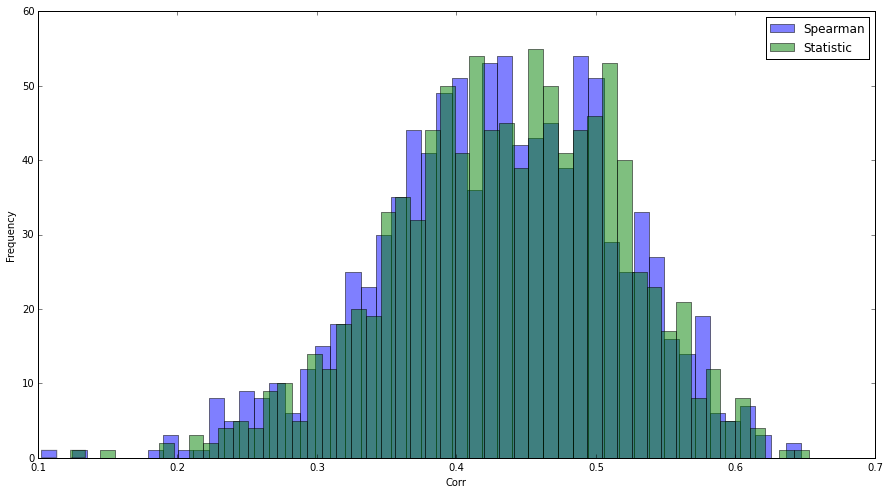

In [16]:
plt.hist(spearman_dist,bins = 50, alpha = 0.5)
plt.hist(corr_dist,bins = 50, alpha = 0.5)
plt.legend(["Spearman", "Statistic"])
plt.xlabel("Corr")
plt.ylabel("Frequency");
plt.gcf().set_size_inches(15,8)
plt.show()

In [17]:
n_experiments = 1000 #做一千次试验
n_array = 100#试验数组的长度
noise = 0.3#干扰系数
spearman_dist = np.ndarray(n_experiments)#记录每次试验的相关性
corr_dist = np.ndarray(n_experiments)
for i in range(n_experiments):
    X_ex = np.random.rand(n_array)#我们用了正太分布
    Y_ex = np.exp(X_ex) + noise * np.random.normal(size=n_array) 
    spearman_dist[i] = spearman_rank_corr(X_ex,Y_ex)
    corr_dist[i] = np.corrcoef(X_ex,Y_ex)[0,1]
print("等级相关性平均值:%s"%np.mean(spearman_dist))
print("统计相关性平均值:%s"%np.mean(corr_dist))

等级相关性平均值:0.848099405941
统计相关性平均值:0.846286848256


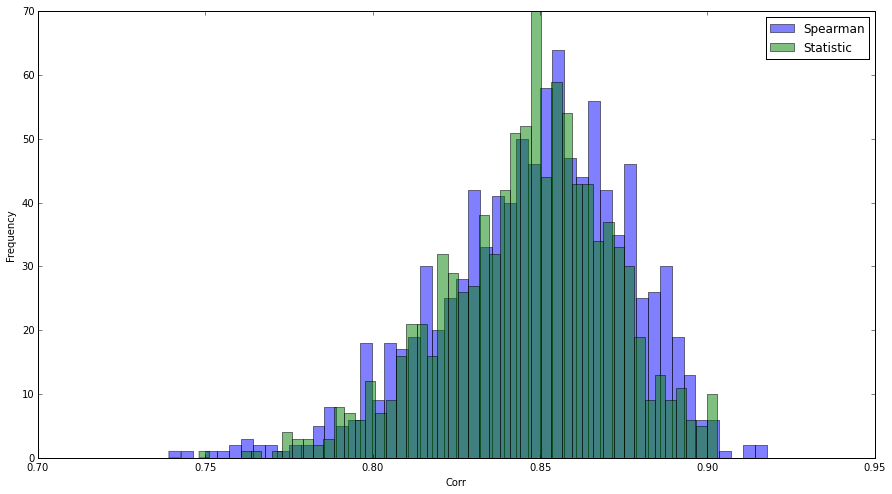

In [18]:
plt.hist(spearman_dist,bins = 50, alpha = 0.5)
plt.hist(corr_dist,bins = 50, alpha = 0.5)
plt.legend(["Spearman", "Statistic"])
plt.xlabel("Corr")
plt.ylabel("Frequency");
plt.gcf().set_size_inches(15,8)
plt.show()

两者分布图几乎重合。所以等级相关性还是针对 **非正态分布** 的数据时，效果才会显著。

最后我们看下等级相关性在不同噪音的情况下的表现

In [19]:
n_experiments = 1000 #做一千次试验
n_array = 100#试验数组的长度
noise = np.linspace(0,3,30)#干扰系数
spearman_average = []#记录每次试验的相关性
corr_average = []
for wn in noise:
    spearman_arr = np.ndarray(n_experiments)
    corr_arr = np.ndarray(n_experiments)
    for i in range(n_experiments):
        X_ex = np.random.poisson(size = n_array)#我们用了泊松分布，这样数据就打破了假设：符合正太分布
        Y_ex = np.exp(X_ex) + wn * np.random.normal(size=n_array) 
        spearman_arr[i] = spearman_rank_corr(X_ex,Y_ex)
        corr_arr[i] = np.corrcoef(X_ex,Y_ex)[0,1]
    spearman_average.append(np.mean(spearman_arr))
    corr_average.append(np.mean(corr_arr))

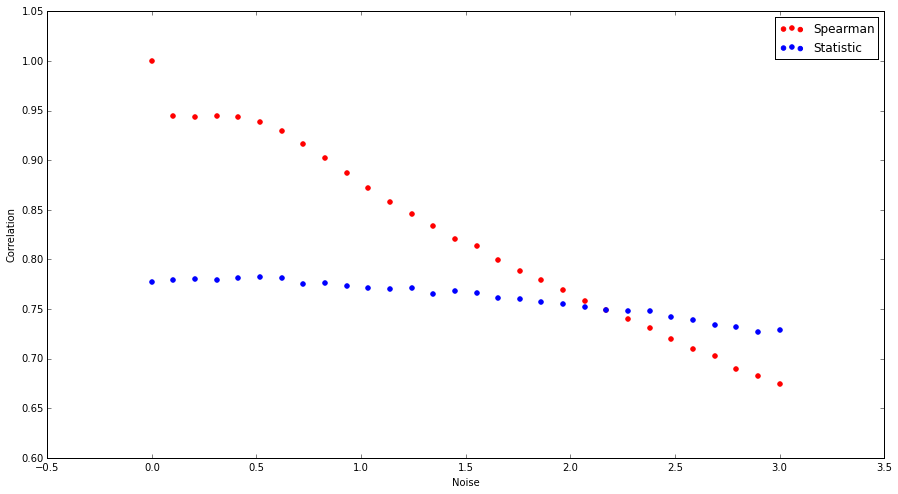

In [20]:
plt.scatter(noise,spearman_average,color = 'r')
plt.scatter(noise,corr_average, color = 'b')
plt.legend(["Spearman", "Statistic"])
plt.xlabel("Noise")
plt.ylabel("Correlation");
plt.gcf().set_size_inches(15,8)
plt.show()

可以看出，等级相关性在低噪到中等偏上噪音时都比统计相关性要好，但是有趣的是当噪音过大时，等级相关性的表现反而减弱了。
statsmodel模块里就有内设好的functionstats.spearmanr(X,Y)，平时做数据研究时可以直接调用。


##Cointegration(共积)

说了这么多理论的东西，最后我们讨论点实际的，怎样通过相关性来做数据分析。
假设你通过研究发现两只股票，AAPL，MSFT相关性很高 (corr >> 0 or corr << 0)
这说明：1.两只股票可能没有时间延迟 2.两只股票之间的差值可能会在一定范围内波动
如果有一天，你发现AAPL和MSFT之间的差值大于了应有的范围，很有可能是:

*其中一只股票价格偏高，被高估

*其中一只股票价格偏低，被低估

所以我们要做的是，买入被低估的股票，当两只股票价格差值再次回到稳定区域时，我们卖出手里股票；卖空被高估的股票，然后当差值稳定时，再买回头寸。
这种交易方式叫成对交易，而上述所提到的概念就是共积。下面我们写个例子：





In [21]:
import pandas as pd
from statsmodels.tsa.stattools import coint#共积

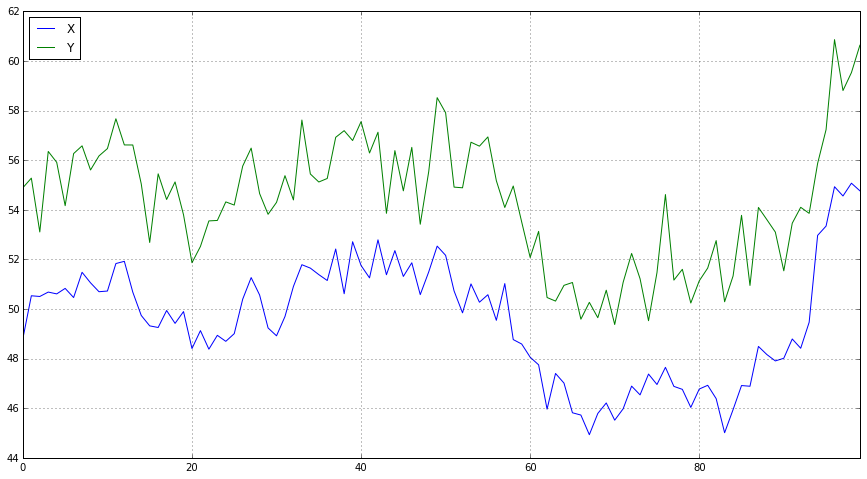

In [22]:
X_return = np.random.normal(0,1,100)
X = pd.Series(np.cumsum(X_return), name = 'X') + 50#模拟股票价格
noise = np.random.normal(0,1,100)
Y  = X + 5 + noise # X 和 Y之间的差值在5左右徘徊
Y.name = 'Y'
pd.concat([X,Y],axis = 1).plot()
plt.gcf().set_size_inches(15,8)

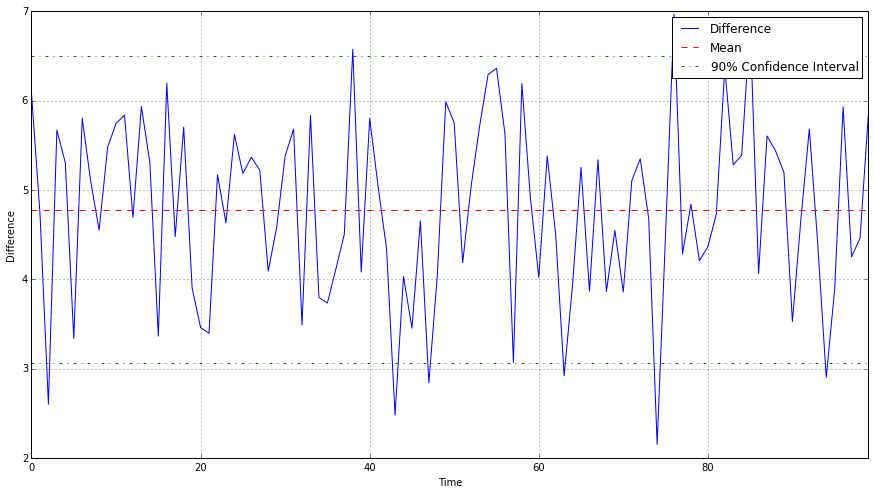

In [23]:
diff = Y - X #计算两组数据之间的差值
diff.name = 'Difference'
diff.plot()
plt.axhline(diff.mean(), color = 'red', linestyle = '--')
plt.axhline(diff.mean() + 1.67 * diff.std(), color = 'green', linestyle = '-.')
plt.axhline(diff.mean() - 1.67 * diff.std(), color = 'green', linestyle = '-.')

plt.xlabel("Time")
plt.ylabel("Difference")
plt.legend(["Difference", "Mean", "90% Confidence Interval"])
plt.gcf().set_size_inches(15,8)

我们现在得到了一个围绕5上下波动的图，从图上直观的可以看出，两数据差值是围绕5上下波动的。为了更加确定，还需要进行假设检验
，即上次讲义里提到的p-value。


In [24]:
conit_corr, pvalue,_ = coint(X,Y)
print("P值:%s"%pvalue)

P值:5.434579367e-13


p-value非常小，说明这组数据基本上是含有稳定的共积，其差值不是随机游走。
下面再来看看两组数据的相关性：

In [25]:
X.corr(Y)

0.91596938783868731

两组数据相关性极高。
但是相关性高并不能直接推出两组数据之间存在共积，请看下面的例子：

相关性:0.952561719909
共积P值:0.710171176671


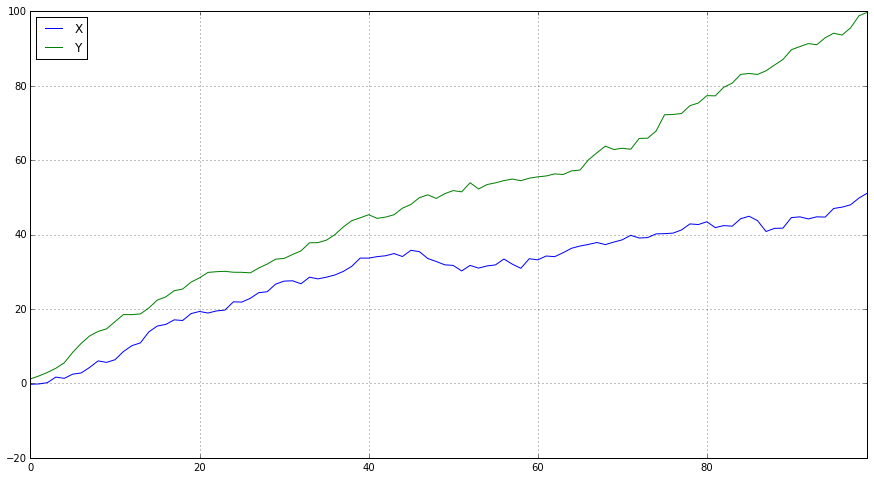

In [26]:

X_noise = np.random.normal(0.5,1,100)#噪音的平均值是0.5
Y_noise = np.random.normal(1,1,100)#噪音的平均值是1
X_price = pd.Series(np.cumsum(X_noise), name = 'X') 
Y_price = pd.Series(np.cumsum(Y_noise), name = 'Y') 
pd.concat([X_price,Y_price],axis = 1).plot()
plt.gcf().set_size_inches(15,8)
print("相关性:%s"%X_price.corr(Y_price))
_,pvalue,_ = coint(X_price,Y_price)
print("共积P值:%s"%pvalue)

可以看出，虽然二者相关性很高，但是几乎不存在共积。

说了这么多废话，让我们再回到开始时的交易策略。
首先我们可以写个function去从数据库里找到具有共积的两只股票

In [97]:
def find_cintegrated_pairs(data):
    n = data.shape[1]
    pvalue_matirx = np.ones((n,n))
    pairs = {}
    keys = data.keys()
    for i in range(n):
        for j in range(i + 1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            _,pvalue,_ = coint(S1,S2)
            pvalue_matirx[i,j] = pvalue
            if pvalue < 0.05:
                pairs[(keys[i],keys[j])] = pvalue
    return pvalue_matirx, pairs

In [98]:
import tushare as ts
import pandas.io.data as web 
import datetime
HScodes = ts.get_hs300s().code #获取沪深300的股票号

In [204]:
codes = HScodes[np.random.randint(0,300,10)]
codes = codes.tolist()
for i in range(len(codes)):
    if codes[i][0] == '6':
        codes[i] = codes[i] + '.SS'
    else:
        codes[i] = codes[i] + '.SZ'
print(codes) #随机选出10只股票，这里我用的是yahoo获取数据，而不是tushare，喜欢用tushare的同学可以不参考这段代码

['601989.SS', '601899.SS', '002310.SZ', '000063.SZ', '603000.SS', '000768.SZ', '600705.SS', '600317.SS', '002673.SZ', '600066.SS']


In [205]:
start =datetime.datetime(2014,6,1)
end = datetime.datetime(2015,6,1) #我们用一年的时间去做测试
codes.append('000001.SS')#加入沪指
data = web.DataReader(codes, 'yahoo', start, end)['Close']
data = data.dropna(axis = 0) #删去NA
pvalues, pairs = find_cintegrated_pairs(data)
print(pairs) 

{('000063.SZ', '600705.SS'): 0.014331765863526644, ('000063.SZ', '002673.SZ'): 0.01918850692195518, ('000768.SZ', '600705.SS'): 0.042631614309653967, ('000768.SZ', '601899.SS'): 0.037324767705208026, ('600317.SS', '601899.SS'): 0.024463011187499998, ('600317.SS', '600705.SS'): 0.018861472942831345, ('000001.SS', '002673.SZ'): 0.047189982107702977, ('600705.SS', '601989.SS'): 0.011849264212813196, ('000063.SZ', '601989.SS'): 0.00042133796069042465, ('601899.SS', '601989.SS'): 0.0032813518591733679, ('600317.SS', '601989.SS'): 0.017830510091807805, ('600705.SS', '601899.SS'): 0.010511620672470166}


通过我们的function, 我们找到了多组具有共积的股票。每组中前面是股票代码，后面是测试的p-value,为了更加清晰的识别，我们打印出热力图

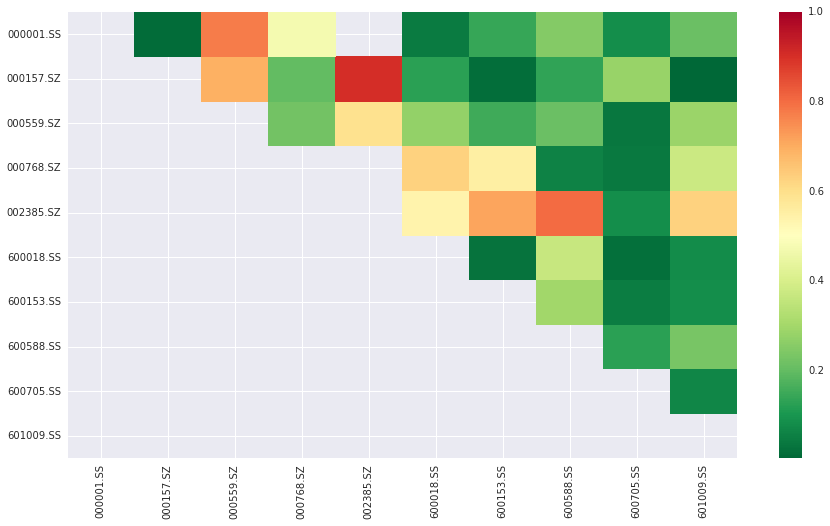

In [111]:
import seaborn
seaborn.heatmap(pvalues, xticklabels = data.keys(), yticklabels = data.keys(),cmap = 'RdYlGn_r', mask = (pvalues >= 0.95))
plt.grid(True)
plt.gcf().set_size_inches(15,8) #用热力图打印可以更加清晰的辨别

下面选取一组做交易策略回测。我们选取p值最小的一组做回测。每组股票只买卖一股。

In [453]:
start =datetime.datetime(2015,3,6)#我们多选取了60天用来计算模型初始化的数值
end = datetime.datetime(2016,4,1) 
test_codes = ['000063.SZ', '601989.SS']
histdata = web.DataReader(test_codes, 'yahoo', start, end)['Close']
histdata = histdata.dropna(axis = 0) 


In [454]:
def TradingAlgo_with_Short(data, rolling_days):
    #这个function里我们允许卖空
    buyPrice = 0#买入股票价格
    shortPrice = 0#卖出股票价格
    income = 0#总收益
    position = {}#记录你每只股票的交易行为
    holdPos = False#是否持仓
    codes = data.keys()
    ratios = data[codes[1]]/data[codes[0]]#两只股票的比值
    S = data[codes[1]]
    bench = data[codes[0]]
    for i in range(rolling_days, data.shape[0]):
        mean = ratios[(i - rolling_days) : i ].mean()
        std = ratios[(i - rolling_days)  : i ].std()
        zscores = (ratios[i] - mean)/std#将之比值按标准化成z-score

        if  not holdPos and zscores > 0.7:#如果比值超出0.7个标准差，卖出（做空）股票，然后买入股指
            shortPrice = S[i]
            buyPrice = bench[i]
            holdPos = True
            position["long"] = codes[0]
            position["short"] = codes[1]
            print("Date %s :Short %s: %s" %(data[position["short"]].index[i], position["short"],
                                           data[position["short"]][i]))
            print("Date %s: Buy %s: %s"%(data[position["long"]].index[i], position["long"],
                                         data[position["long"]][i]))
            print("\n")
       
        elif holdPos and (zscores <= 0.4 and zscores >= -0.4):#如果回落到可接受区域，我们平仓
            print("Date %s :Buy Short %s: %s" %(data[position["short"]].index[i], position["short"],
                                                data[position["short"]][i]))
            
            print("Date %s: Sell %s: %s"%(data[position["long"]].index[i], position["long"],
                                          data[position["long"]][i]))
            print("\n")

            income = income + data[position["long"]][i] - buyPrice + shortPrice - data[position["short"]][i]
            
            holdPos = False#持仓的flag 变为否
            
            
        elif zscores < -1 and not holdPos: #如果比值低于 -1个标准差，买入股票，做空股指
                buyPrice = S[i]
                shortPrice = bench[i]
                holdPos = True
                position["long"] = codes[1]
                position["short"] = codes[0]
                print("Date %s :short %s: %s" %(data[position["short"]].index[i], position["short"],
                                                data[position["short"]][i]))
                print("Date %s: Buy %s: %s"%(data[position["long"]].index[i], position["long"],
                                         data[position["long"]][i]))
                
                print("\n")
   
    if holdPos:#最后如果有持仓，就平仓  
        print("Date %s :Buy Sell %s: %s" %(data[position["short"]].index[-1], 
                                           position["short"],data[position["short"]][-1]))
        print("Date %s: Short %s: %s"%(data[position["long"]].index[-1], position["long"],
                                       data[position["long"]][-1]))
        income = income + data[position["long"]][-1] - buyPrice + shortPrice - data[position["short"]][-1]
    
    return income
        

In [455]:
income = TradingAlgo_with_Short(histdata,60)

print("最终收益:%s"%income)

Date 2015-05-29 00:00:00 :Short 601989.SS: 17.67
Date 2015-05-29 00:00:00: Buy 000063.SZ: 30.87996


Date 2015-07-02 00:00:00 :Buy Short 601989.SS: 11.99
Date 2015-07-02 00:00:00: Sell 000063.SZ: 22.5


Date 2015-07-13 00:00:00 :Short 601989.SS: 11.35
Date 2015-07-13 00:00:00: Buy 000063.SZ: 17.96004


Date 2015-09-02 00:00:00 :Buy Short 601989.SS: 11.38
Date 2015-09-02 00:00:00: Sell 000063.SZ: 16.64


Date 2015-10-09 00:00:00 :short 000063.SZ: 16.53
Date 2015-10-09 00:00:00: Buy 601989.SS: 10.43


Date 2015-10-12 00:00:00 :Buy Short 000063.SZ: 17.22
Date 2015-10-12 00:00:00: Sell 601989.SS: 11.47


Date 2015-10-26 00:00:00 :short 000063.SZ: 17.81
Date 2015-10-26 00:00:00: Buy 601989.SS: 11.1


Date 2015-10-27 00:00:00 :Buy Short 000063.SZ: 17.61
Date 2015-10-27 00:00:00: Sell 601989.SS: 12.02


Date 2015-10-29 00:00:00 :short 000063.SZ: 17.91
Date 2015-10-29 00:00:00: Buy 601989.SS: 11.25


Date 2016-03-21 00:00:00 :Buy Short 000063.SZ: 15.06
Date 2016-03-21 00:00:00: Sell 601989.SS:

虽然说结果不是非常理想，但基于选取时间是去年最高点下滑到最低点，这样的结果还能接受。

但实际操作中问题会非常多：

* 市场不是你想买，想买就能买；你想卖，想卖就能卖；如果开盘直接涨/跌停，交易员就可以回家打dota了

* 策略是基于历史数据，外因或是内因的改变会导致你交易策略一开始就是错的

* 需要更多的市场研究确定你交易策略的参数，这里是：1.滚动的天数以及平均收益率和标准差 2.zscores的上限，下限以及回归标准

* 不能做空导致你不能为你的头寸对冲

* 突如其来的外因会导致你意外的损失

* 如果用股指期货对冲，股指方向的损失会导致你被追加保证金，很有可能会被强行平仓

这种交易策略也恰巧能够解释去年股市大跌时，为什么基金经理会因为被限制做空股指期货而集体骂娘。因为许多基金经理都是在用股指期货做对冲。如果一边交易被阻止了，就会导致另一边交易毫无保护。所以基金经理要不直接卖掉手里的股票，要不直接一开盘就甩出下跌10%的股指期货做空合同，这样当天基金的损失就能被锁定。但不管怎么做，市场都会被推着继续下行。

既然对于普通股民来说，卖空是不可能的，那下面就选取002673基于大盘的波动做一个交易策略。

In [456]:
start =datetime.datetime(2015,3,6)#我们多选取了60天用来计算模型初始化的数值
end = datetime.datetime(2016,4,1) 
test_codes = ['000001.SS', '002673.SZ']
histdata = web.DataReader(test_codes, 'yahoo', start, end)['Close']
histdata = histdata.dropna(axis = 0) 



In [457]:
def TradingAlgo(data, rolling_days):
    #如果你zscores > 0.7了， 说明你的股票基于市场偏高，持仓的就卖掉，没持仓拉倒；
    #如果你zscores < -1了， 说明你的股票基于市场低估，持仓你就赚了，没持仓的话赶紧买；
    #因为不能卖空，所以模型在市场下跌时会继续购买股票因而导致大量损失，所以加了一个"熔断机制"
    buyPrice = 0
    income = 0
    holdPos = False
    codes = data.keys()
    ratios = data[codes[1]]/data[codes[0]]
    S = data[codes[1]]
    cnt = rolling_days
    Rest = False
    for i in range(rolling_days, data.shape[0]):
        mean = ratios[(i - rolling_days) : i ].mean()
        std = ratios[(i - rolling_days)  : i ].std()
        zscores = (ratios[i] - mean)/std
        
        if(cnt != rolling_days): #休息周期计时
            cnt = cnt + 1
            if (cnt == rolling_days):
                Rest = False
        
        if not Rest and holdPos and (S[i]/buyPrice - 1) < -0.19: #熔断。股票都经历了两个跌停板，那就先别玩了，休息一个周期
            income = income + S[i] - buyPrice
            holdPos = False
            cnt = 0
            Rest = True
            print("Date %s :Cut Sell %s" %(S.index[i], S[i]))
        
          
        if not Rest and zscores > 0.7 and holdPos:
            income = income + S[i] - buyPrice
            holdPos = False
            print("Date %s :Sell %s" %(S.index[i], S[i]))
        elif not Rest and zscores < -1 and not holdPos:
                buyPrice = S[i]
                holdPos = True
                print("Date %s: Buy %s"%(S.index[i], S[i]))
   
    if holdPos:   
        income = income + S[-1] - buyPrice
        print("Date %s :Sell %s" %(S.index[i], S[i]))
    return income
        
    

In [459]:
income = TradingAlgo(histdata, 60)
print("实际收益 %s"%income)

Date 2015-06-08 00:00:00: Buy 38.96
Date 2015-06-18 00:00:00 :Cut Sell 29.36
Date 2015-09-15 00:00:00: Buy 13.8
Date 2015-11-04 00:00:00 :Sell 23.31
Date 2016-02-01 00:00:00: Buy 22.87
Date 2016-03-23 00:00:00 :Sell 29.26
实际收益 6.3


最终15%的收益率还是可以接受的。

既然讨论完了相关性，下期咱们一起写一个完整的组建基金投资组合的例子，涉及到用Nosql或者MySql连接python写入和读取数据->建立模型->回测
如果有任何意见或是希望能在近期学到的内容，请直接联系我:lefty-chen@hotmail.com 或者 qq:392923138
